<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/5_kinds_of_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/150
20/20 [==============================] - 25s 1s/step - loss: 1.6732 - accuracy: 0.2563 - val_loss: 1.5849 - val_accuracy: 0.3125
Epoch 2/150
20/20 [==============================] - 25s 1s/step - loss: 1.5702 - accuracy: 0.3065 - val_loss: 1.3863 - val_accuracy: 0.4102
Epoch 3/150
20/20 [==============================] - 24s 1s/step - loss: 1.4326 - accuracy: 0.3936 - val_loss: 1.3614 - val_accuracy: 0.4492
Epoch 4/150
20/20 [==============================] - 24s 1s/step - loss: 1.3763 - accuracy: 0.4070 - val_loss: 1.2644 - val_accuracy: 0.4648
Epoch 5/150
20/20 [==============================] - 22s 1s/step - loss: 1.3722 - accuracy: 0.4271 - val_loss: 1.2597 - val_accuracy: 0.4688
Epoch 6/150
20/20 [==============================] - 23s 1s/step - loss: 1.3522 - accuracy: 0.4338 - val_loss: 1.2976 - val_accuracy: 0.4336
Epoch 7/150
20/20 [==============================] - 21s 1s/step - loss: 1.2687 - accuracy: 0.4606 - val_loss: 1.1834 - val_accuracy: 0.5078
Epoch 8/150
2

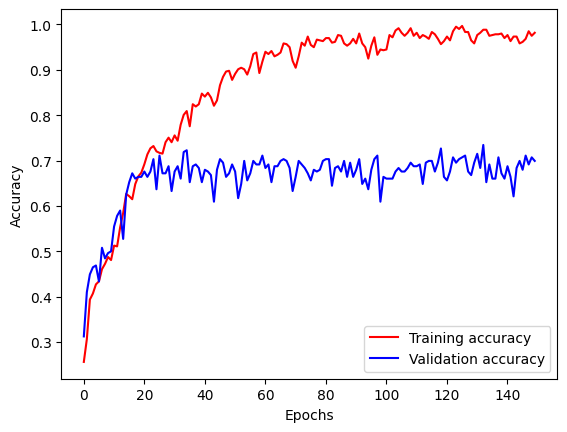

In [2]:
# Import necessary libraries
import os
from os import listdir
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

# Set the data folder and parameters
folder = '/content/drive/MyDrive/PIC_AI/hoa/Flower/'
input_shape = (100,100, 3)
num_classes = 6

# Load and preprocess the data
photos, labels = list(), list()
for file in listdir(folder):
    output = 0.0
    if  file.startswith('Hoa_Bo_Cong_Anh'):
        output = 1.0
    elif file.startswith('Hoa_Cuc'):
        output = 2.0
    elif file.startswith('Hoa_Hong'):
        output = 3.0
    elif file.startswith('Hoa_Huong_Duong'):
        output = 4.0
    elif file.startswith('Hoa_Tulip'):
        output = 5.0


    photo = load_img(folder + file, target_size=input_shape)
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = np.asarray(photos)
labels = np.asarray(labels)

photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(photos, labels, test_size=0.3, random_state=100)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

# Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout regularization
model.add(Dense(6, activation='softmax'))



# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with data augmentation
train = model.fit(datagen.flow(X_train, y_train, batch_size=30), epochs=150, validation_data=(X_val, y_val))

# Evaluate the CNN model
score = model.evaluate(X_val, y_val, verbose=0)

# Evaluate the CNN model
loss, accuracy_val = model.evaluate(X_val, y_val)

a, b = model.evaluate(X_train, y_train)

print("Loss:", a)
print("Accuracy:", b)


# Save the trained CNN model
model.save('/content/drive/MyDrive/colab/5_kinds_of_flowers.h5/')

accuracy = train.history['accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')

val_accuracy = train.history['val_accuracy']  
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')  

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 238ms/step
Hoa_Hong


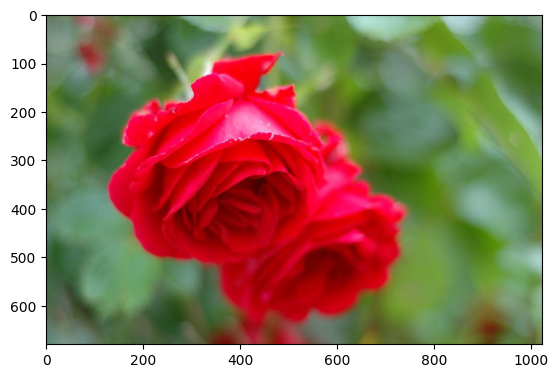

1/1 [==============================] - 0s 54ms/step
Hoa_Cuc


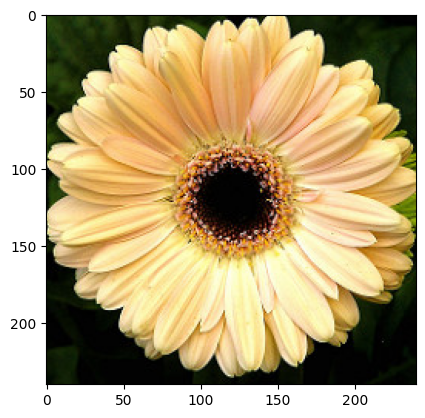

1/1 [==============================] - 0s 45ms/step
Hoa_Huong_Duong


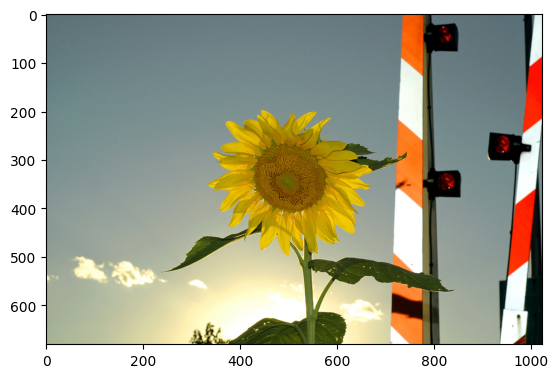

1/1 [==============================] - 0s 52ms/step
Hoa_Tulip


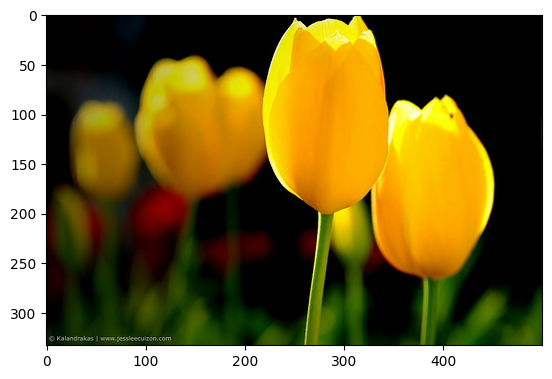

1/1 [==============================] - 0s 32ms/step
Hoa_Bo_Cong_Anh


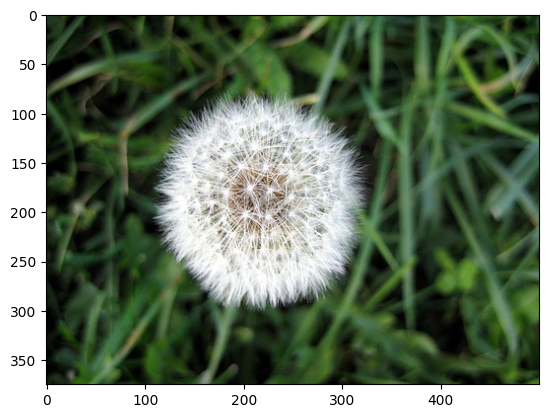

In [3]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/drive/MyDrive/PIC_TEST/flower_test/'
for file in listdir(folder):
  if not file.endswith('.jpg'):
    continue # Skip directories and non-image files
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (100, 100))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name= {1: 'Hoa_Bo_Cong_Anh', 2: 'Hoa_Cuc', 3: 'Hoa_Hong', 4: 'Hoa_Huong_Duong', 5: 'Hoa_Tulip',  0: 'Unknown'}  # Include an entry for Unknown label
  print(class_name[result])
  plt.show()